## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
# 1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>
import numpy as np
# 2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>
import matplotlib.pyplot as plt
# 3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

## 모델 학습에 사용할 데이터셋을 불러옵니다.

In [2]:
pd.set_option('display.max_columns', None)
Data_PATH_train = '../0.Data/tox21_train.csv'
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.
df_train = pd.read_csv(Data_PATH_train)
# pandas 라이브러리의 read_csv 메소드를 활용하여 csv 파일을 load합니다.
df_train

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:,-1]

# Train 과정에 사용할 데이터와 Test 과정에 사용할 데이터를 load한 이후, 
# 해당 데이터 중에서 독립변수와 반응변수를 별도로 저장해줍니다.

# df_train은 X_train(독립변수), y_train(반응변수)로 분할합니다.
# maccs_1열[column = 0]부터 maccs_166열[column = 165]까지는 독립변수이고, 마지막 열(NR-AR)은 반응변수(정답값)입니다.

print(X_train.shape, y_train.shape)

(11130, 166) (11130,)


## 모델을 생성합니다.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
model.fit(X_train, y_train)

# 학습에 사용할 모델은 Lineart Discriminant Analysis(LDA) 입니다.
# Linear Discriminant Analysis (LDA)는 지도 학습의 분류 및 차원 축소 기법으로, 클래스 간 분산은 최대화하고 클래스 내 분산은 최소화하는 방식으로
# 데이터를 가장 잘 구분하는 축을 찾는 것을 목표로 합니다.

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

## Linear Discriminant Analysis (LDA)의 주요 하이퍼파라미터

1. `n_components` : 축소할 차원의 수입니다. 이 값은 최대 클래스 수 - 1이 될 수 있습니다.
2. `solver` : 계산 방법을 선택합니다. 가능한 옵션에는 'svd' (기본값), 'lsqr', 및 'eigen'이 있습니다.
    - `svd` : 특이값 분해를 사용하며, 추가 계산 없이 효율적으로 작동합니다.
    - `lsqr` : 최소 제곱 해를 구하기 위한 방법으로, shrinkage를 지원합니다.
    - `eigen` : 고유값 분해를 사용하며, shrinkage를 지원합니다.
3. `shrinkage` : 'auto', None, 또는 0과 1 사이의 값을 가질 수 있습니다. 클래스 내 분산의 추정을 개선하기 위해 사용됩니다. 주로 작은 샘플 크기에서 유용합니다.
4. `priors` : 클래스의 사전 확률입니다. 기본적으로 클래스는 데이터에서의 비율을 반영한 사전 확률을 가집니다.
5. `tol` : 수치적 안정성을 위한 임계값입니다. 이 값은 모델의 정밀도에 영향을 줄 수 있습니다.

### 사용 예

- LDA는 특히 차원이 높은 데이터에서 차원을 축소하고자 할 때, 또는 선형으로 구분 가능한 클래스를 가진 분류 문제에 매우 유용합니다. 
- LDA 사용 이후, 로지스틱 회귀, 서포트 벡터 머신 등 다른 분류 알고리즘으로 처리될 수 있습니다.

### 참고 자료

- LDA는 sklearn 라이브러리에서 쉽게 사용할 수 있으며, 다음 링크에서 더 많은 정보를 얻을 수 있습니다:
- (https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

LDA의 효과는 데이터의 구조와 분석하고자 하는 문제에 크게 의존합니다. 따라서, 다양한 하이퍼파라미터 설정을 실험하여 최적의 결과를 도출하는 것이 중요합니다.


# Linear Discriminant Analysis (LDA) 목적함수

LDA의 목적 함수는 클래스 간 분산($S_B$)과 클래스 내 분산($S_W$)의 비율을 최대화하는 벡터 $w$를 찾는 것입니다. 이를 수학적으로 표현하면 다음과 같습니다:

$$
w^* = \arg \max_w \frac{w^T S_B w}{w^T S_W w}
$$

여기서:
- $S_B$는 클래스 간 분산 행렬입니다.
- $S_W$는 클래스 내 분산 행렬입니다.
- $w$는 데이터를 투영할 방향을 나타내는 벡터입니다.

## 추가 링크

scikit-learn에서 LDA를 사용하기 위한 더 자세한 정보와 파라미터 설정에 대해서는 공식 문서에서 확인할 수 있습니다:

- LinearDiscriminantAnalysis 공식 문서: [scikit-learn LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)


## Linear Discriminant Analysis Projection 시각화

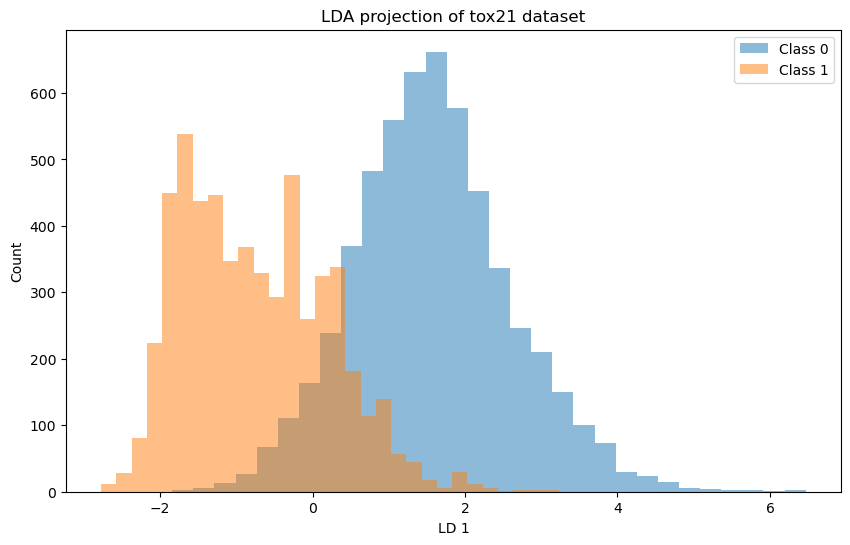

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# LDA 모델을 생성하고, 차원 축소를 수행합니다.
plot_model = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto') # LDA 인스턴스 생성, 1차원 축소
X_r2 = plot_model.fit_transform(X_train, y_train) # LDA를 사용하여 데이터를 1차원으로 축소  

# 1차원 축소 데이터를 플롯합니다.
plt.figure(figsize=(10, 6))
plt.hist(X_r2[y_train == 0], bins=30, alpha=0.5, label='Class 0')
plt.hist(X_r2[y_train == 1], bins=30, alpha=0.5, label='Class 1')
plt.legend(loc='best')
plt.title('LDA projection of tox21 dataset')
plt.xlabel('LD 1')
plt.ylabel('Count')
plt.show()

# - LDA는 클래스 간 분산을 최대화하고 클래스 내 분산을 최소화하는 선형 축을 찾아, 고차원 데이터를 저차원으로 효과적으로 축소하는 기법입니다.
# - 이 예제에서는 166개 특성을 가진 데이터를 1차원으로 축소하는 과정을 보여주고 있기에, 축소된 데이터를 1차원 히스토그램으로 시각화하여 
# - 반응변수의 두 클래스(0과 1) 사이의 분리 정도를 직관적으로 파악할 수 있습니다.

## 결정 경계 시각화

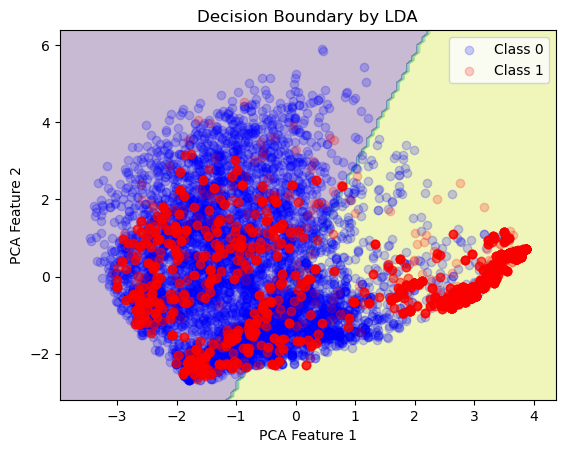

Confusion Matrix in X_pca Dataset


array([[4134, 1431],
       [2410, 3155]], dtype=int64)

In [6]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# LDA 학습
model_pca = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
model_pca.fit(X_pca, y_train)

# 결정 경계 시각화를 위한 그리드 생성
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열

# LDA 모델을 사용하여 예측
y_pred = model_pca.predict(X_new).reshape(x1.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y_train==0], X_pca[:, 1][y_train==0], color='blue', alpha=0.2, label='Class 0')
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y_train==1], X_pca[:, 1][y_train==1], color='red', alpha=0.2, label='Class 1')
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.title("Decision Boundary by LDA")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.show()
# 시각화를 출력합니다.
# 아래 그림은 두 Feature를 사용하여 LDA를 학습한 결과입니다. 2차원 축을 사용하여 결정 경계를 쉽게 표현할 수 있기에 Feature 개수를 2개로 줄인 후 이를 시각화하였습니다.

print("Confusion Matrix in X_pca Dataset")
confusion_matrix(y_train, model_pca.predict(X_pca))
# 혼동 행렬을 출력합니다.

## 혼동 행렬을 출력합니다.

In [7]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix

Data_PATH_test = '../0.Data/tox21_test.csv'
df_test = pd.read_csv(Data_PATH_test)
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:,-1]
# df_test는 X_test(독립변수), y_test(반응변수)로 분할합니다.

print("Confusion Matrix in Test Dataset")
confusion_matrix(y_test, model.predict(X_test))

# 혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
# - 1208개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
# - 183개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
# - 29개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
# - 33개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)


Confusion Matrix in Test Dataset


array([[1208,  183],
       [  29,   33]], dtype=int64)